In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease=pd.read_csv("data/heart-disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [6]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [7]:
y.isna().sum()

0

In [5]:
np.random.seed(34)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

clf_single_score=clf.score(X_test,y_test)

clf_cross_val=np.mean(cross_val_score(clf,X,y,cv=5))

clf_single_score,clf_cross_val

(0.8852459016393442, 0.8182513661202184)

In [6]:
from sklearn.metrics import roc_curve,roc_auc_score

y_predict=clf.predict_proba(X_test)
y_predict[:10]

array([[0.11, 0.89],
       [0.84, 0.16],
       [0.97, 0.03],
       [0.52, 0.48],
       [0.01, 0.99],
       [0.61, 0.39],
       [0.4 , 0.6 ],
       [0.62, 0.38],
       [1.  , 0.  ],
       [0.36, 0.64]])

In [7]:
y_predict_positive=y_predict[:,1]
y_predict_positive[:10]

array([0.89, 0.16, 0.03, 0.48, 0.99, 0.39, 0.6 , 0.38, 0.  , 0.64])

In [8]:
fpr,tpr,threshold=roc_curve(y_test,y_predict_positive);
fpr_1,tpr_1,threshold_1=roc_curve(y_test,y_test);

0.9520697167755992

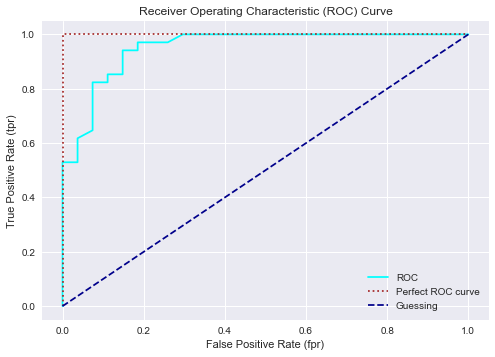

In [9]:
def plot_roc_curve(fpr,tpr):
    
    plt.style.use("seaborn")
    
    fig,ax=plt.subplots()
    
    ax.plot(fpr,tpr,color='aqua',label='ROC')
    
    ax.plot(fpr_1,tpr_1,color='brown',linestyle =':',label='Perfect ROC curve')
    
    ax.plot([0,1],[0,1],color='darkblue',linestyle ='--', label='Guessing')   
    
    ax.set(xlabel='False Positive Rate (fpr)',
           ylabel='True Positive Rate (tpr)',
           title = "Receiver Operating Characteristic (ROC) Curve")
    
    ax.legend()    
    
plot_roc_curve(fpr,tpr)
roc_auc_score(y_test,y_predict_positive)    

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  4],
       [ 3, 31]], dtype=int64)

In [11]:
# Using Crosstab
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,4
1,3,31


In [2]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: F:\Study\Python\Python_ML\sklearn_intro\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:         218 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0




seaborn-0.11.2       | 218 KB    |            |   0% 
seaborn-0.11.2       | 218 KB    | ##9        |  29% 
seaborn-0.11.2       | 218 KB    | ########## | 100% 
seaborn-0.11.2       | 218 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


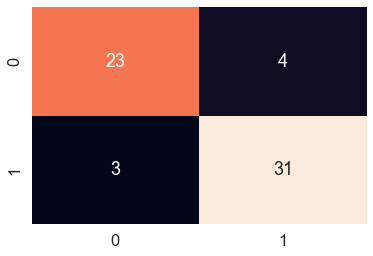

In [14]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat,
           annot=True,
           cbar=False);

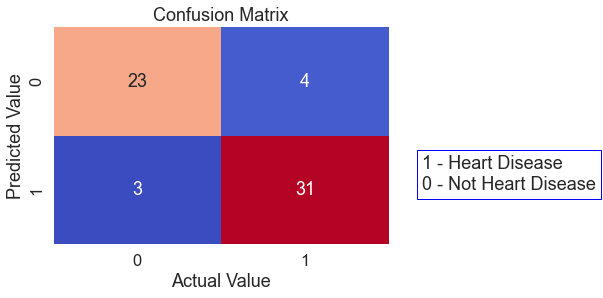

In [48]:
def plot_conf_matrix (conf_mat):
    fig,ax=plt.subplots()
    ax=sns.heatmap(conf_mat,
                  annot=True,
                  cbar=False,
                  cmap='coolwarm')
    
    ax.set(title='Confusion Matrix',
          xlabel='Actual Value',
          ylabel='Predicted Value')
    
    ax.text(2.2,
            1.5,
            '1 - Heart Disease\n0 - Not Heart Disease',
           bbox={'facecolor': 'white', 'edgecolor':'blue', 'boxstyle':'square'})
    
       
plot_conf_matrix(conf_mat)

In [64]:
y_test.head()

56     1
297    0
262    0
170    0
74     1
Name: target, dtype: int64

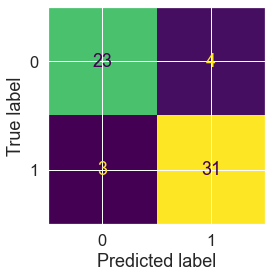

In [16]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(clf,
                      X_test,
                      y_test,
                      colorbar=False);
plt.grid('off')

In [49]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

